In [ ]:
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('datacovid19.csv')

In [ ]:
df.head()

,Tweet,translate
0,"Cegah mata rantai Covid-19,mari kita dirumah s...","Prevent chain Covid-19, let us at home alone u..."
1,aku mohon yaAllah semoga wabah covid-19 menghi...,I beg yaAllah covid 19th plague may disappear ...
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,Papua province Raise Emergency Response Status...
3,Covid belum nyampe prigen mbak hmm hoax,Prigen nyampe Covid not ya hmm hoax
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...","Nyuruh smart people, aja lu Togog. That crowd ..."


In [ ]:
ps = PorterStemmer() 

def stemming_data(x):
    return ps.stem(x)

df['translate'] = df['translate'].apply(stemming_data)

In [ ]:
dataset = list(df['translate'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(dataset):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0:
        total_positif += 1
        status.append('positive')
    elif analysis.sentiment.polarity == 0:
        total_netral += 1
        status.append('neutral')
    else:
        total_negatif += 1
        status.append('negative')

    total += 1 
    
print(f'Hasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analisis Data:
Positif = 455
Netral = 533
Negatif = 188

Total Data : 1176


In [ ]:
status = pd.DataFrame({'klasifikasi': status})
df['klasifikasi'] = status
df

,Tweet,translate,klasifikasi
0,"Cegah mata rantai Covid-19,mari kita dirumah s...","prevent chain covid-19, let us at home alone u...",neutral
1,aku mohon yaAllah semoga wabah covid-19 menghi...,i beg yaallah covid 19th plague may disappear ...,neutral
2,Pemprov Papua Naikkan Status Jadi Tanggap Daru...,papua province raise emergency response status...,neutral
3,Covid belum nyampe prigen mbak hmm hoax,prigen nyampe covid not ya hmm hoax,neutral
4,"Nyuruh orang pintar, lu aja Togog. Itu kerumun...","nyuruh smart people, aja lu togog. that crowd ...",positive
...,...,...,...
1171,Seluruh negara di dunia mengalami masa sulit k...,all countries in the world having a difficult ...,negative
1172,"Setelah covid dan skripsi disaster selesai, ma...","after covid and disaster thesis completed, wou...",neutral
1173,"Malam ini!! Projek ""BENDA BOLEH BINCANG"" 9 mal...","tonight!! project ""objects to be talk"" 9 night...",positive
1174,Pontang - panting di koyak covid 19,helter - skelter in torn covid 19,neutral


In [ ]:
def show_pie(label, data, legend_title) :
    fig, ax = plt.subplots(figsize=(8, 10), subplot_kw=dict(aspect='equal'))

    labels = [x.split()[-1] for x in label]

    def func(pct, allvals):
        absolute = int(pct/100.*np.sum(allvals))
        return "{:.1f}% ({:d})".format(pct, absolute)

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data), 
                                      textprops=dict(color="w"))

    ax.legend(wedges, labels,
              title= legend_title,
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    plt.show()

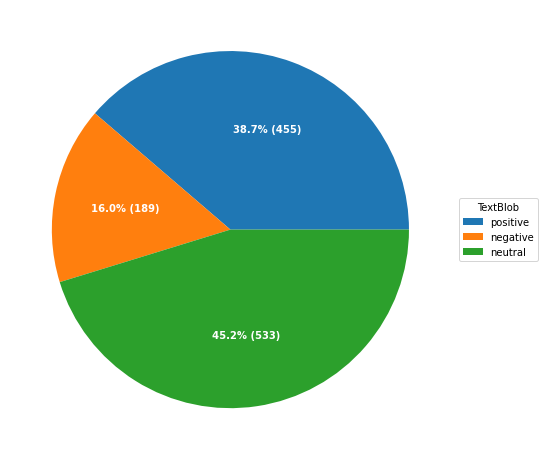

In [ ]:
label = ['positive', 'negative', 'neutral']
count_data = [total_positif+1, total_negatif+1, total_netral]

show_pie(label, count_data, "TextBlob")

In [ ]:
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud) 
    plt.axis("off");

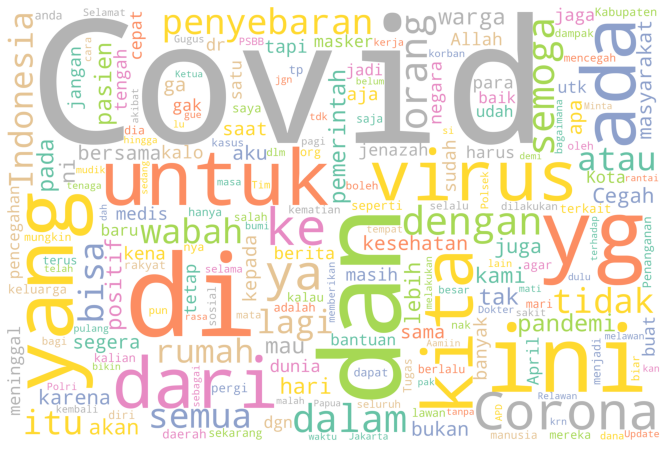

In [ ]:
all_words = ' '.join([tweets for tweets in df['Tweet']])
wordcloud = WordCloud(width = 3000, height = 2000, random_state=3, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(all_words)
plot_cloud(wordcloud)

In [ ]:
status.to_excel('datacovid.xlsx',index=False)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
dataset = df.drop(['Tweet'], axis=1, inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [ ]:
import random

set_positif = []
set_negatif = [] 
set_netral = []

for n in dataset:
    if(n[1] == 'positive'):
      set_positif.append(n)
    elif(n[1] == 'negative'):
      set_negatif.append(n)
    else: 
      set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
     train_set.append(n)

In [ ]:
from textblob.classifiers import NaiveBayesClassifier
cl = NaiveBayesClassifier(train_set)
print('Akurasi Test:', cl.accuracy(dataset))

Akurasi Test: 0.7976190476190477


In [ ]:
dataset = list(df['translate'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, tweet in enumerate(dataset):
    analysis = TextBlob(tweet, classifier=cl)

    if analysis.classify() == 'positive':
        total_positif += 1
    elif analysis.classify() == 'neutral':
        total_netral += 1
    else:
        total_negatif += 1
    
    status.append(analysis.classify())
    total += 1 
    
print(f'\nHasil Analisis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analisis Data:
Positif = 365
Netral = 722
Negatif = 89

Total Data : 1176
